In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('breastdata.csv',names=['id','thickness','size_uniformity',
                                                            'shape_uniformity','adhesion','cellsize',
                                                            'nuclei','chromatin','nucleoli','mitoses',
                                                            'type'])
dataset = dataset.drop('id',axis=1)

In [3]:
dataset.loc[dataset['nuclei']=='?','nuclei'] = np.nan
dataset = dataset.dropna()
dataset['nuclei'] = dataset['nuclei'].astype('int')

In [4]:
def test_train_split(dataset, test_size = 0.25):
    train_size = 1-test_size
    #Separation of values for statified dataset
    truedf = dataset[dataset.iloc[:,-1] == 2]
    falsedf = dataset[dataset.iloc[:,-1] == 4]
    
    #contatinating 75% of true and flase data for train set and remaining for test set
    train_set = pd.concat([truedf[0:int(truedf.count()[0]*train_size)],falsedf[0:int(falsedf.count()[0]*train_size)]])
    test_set = pd.concat([truedf[int(truedf.count()[0]*train_size):],falsedf[int(falsedf.count()[0]*train_size):]])
    
    return train_set,test_set

train,test = test_train_split(dataset)

In [5]:
train = train.values
test = test.values

In [ ]:
#print(train[0,-1],test[-2],(np.array(train[:,:-1])-np.array(test[-2,:-1]))**2)

In [ ]:
# distance = []
# i = 0
# for row in e_distance:
#     distance.append([np.sqrt(np.sum(row)),train[i,-1]])
#     i=i+1

In [ ]:
# distance.sort()

In [ ]:
# k=4
# l = [distance[i][1] for i in range(1,k)]

In [ ]:
# predict = 4 if l.count(2) < l.count(4) else 2
# predict

In [6]:
def KNNClassifier(k = 3):
    predicted = []
    for j in range(test.shape[0]):
        e_distance = (np.array(train[:,:-1])-np.array(test[j,:-1]))**2
        distance = []
        i = 0
        for row in e_distance:
            distance.append([np.sqrt(np.sum(row)),train[i,-1]])
            i=i+1
        distance.sort()
        l = [distance[i][1] for i in range(1,k)]
        predict = 4 if l.count(2) < l.count(4) else 2
        predicted.append(predict)
    return predicted

In [7]:
predicted = KNNClassifier(7)
actual = test[:,-1]

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
print(confusion_matrix(actual,predicted))

[[111   0]
 [  2  58]]


In [10]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           2       0.98      1.00      0.99       111
           4       1.00      0.97      0.98        60

   micro avg       0.99      0.99      0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [11]:
#elbow method
error_rate = []
for i in range(3,40):
    predicted = KNNClassifier(i)
    error_rate.append((actual != predicted).mean())

Text(0, 0.5, 'Error Rate')

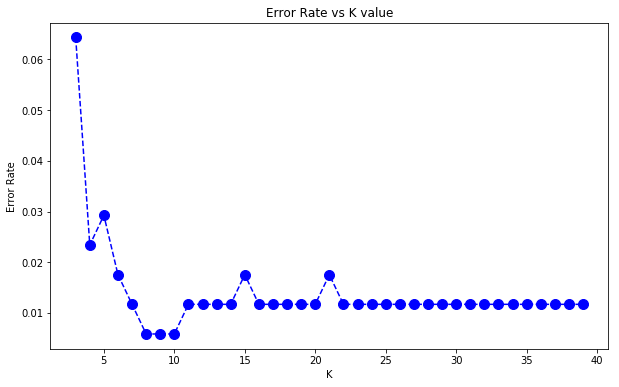

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(3,40),error_rate,color="blue",linestyle='dashed',marker='o',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')